C:\Users\m1953\AppData\Local\Temp\ipykernel_7588\4108085679.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_substances.values, y=top_substances.index, palette="magma")


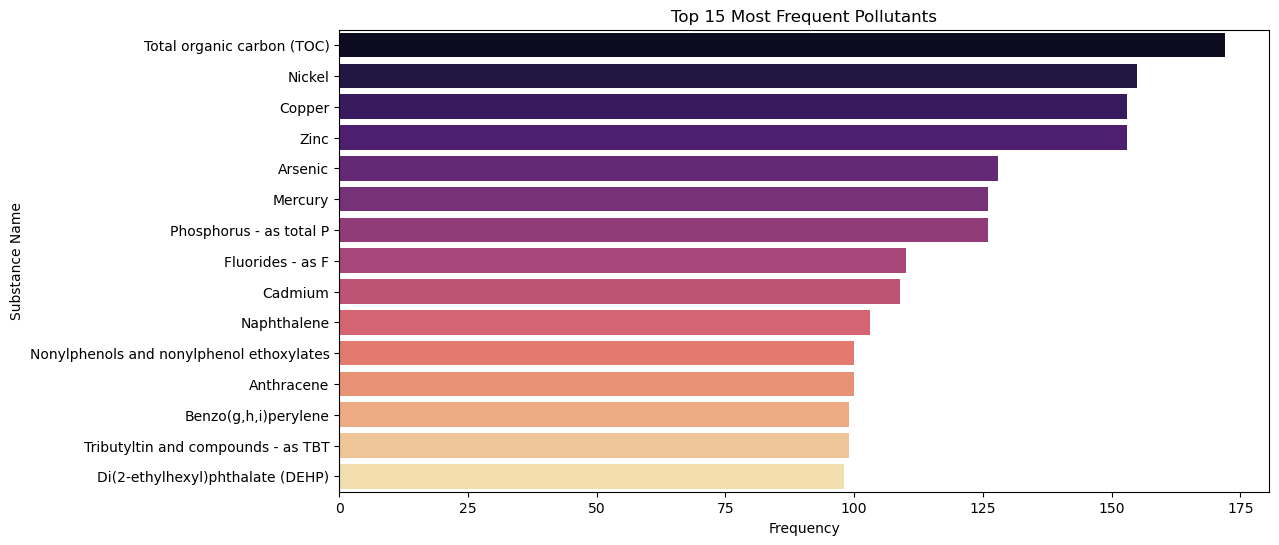

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading Data
file_path = "C:\\Users\\m1953\\Downloads\\pollution_no_gas_cleaned.xlsx" 
df = pd.read_excel(file_path)

# Select the SUBSTANCE NAME column and remove null values
df_substances = df[['SUBSTANCE NAME']].dropna()

# Plot a bar graph of the top 15 pollutants
top_n = 15 
top_substances = substance_counts.nlargest(top_n)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_substances.values, y=top_substances.index, palette="magma")
plt.xlabel("Frequency")
plt.ylabel("Substance Name")
plt.title(f"Top {top_n} Most Frequent Pollutants")
plt.show()


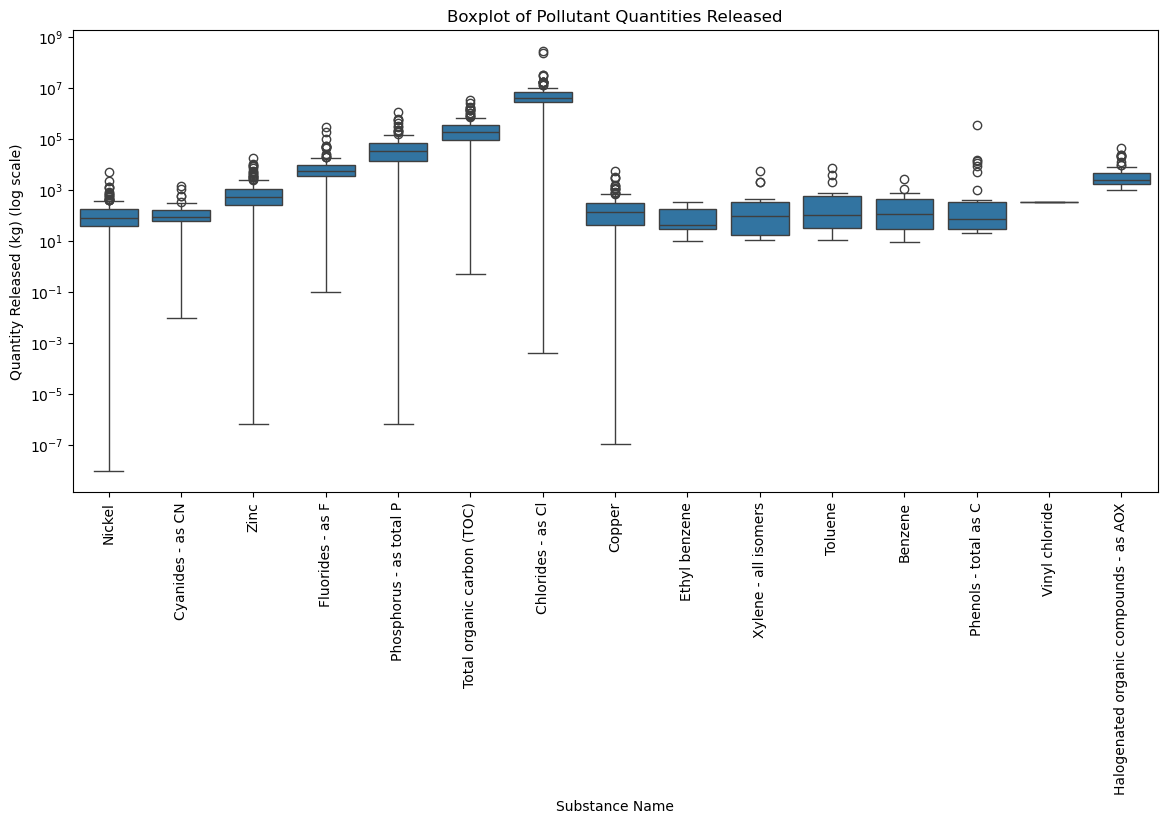

C:\Users\m1953\AppData\Local\Temp\ipykernel_7588\4279897878.py:22: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df_filtered[df_filtered["SUBSTANCE NAME"] == substance]["QUANTITY RELEASED (kg)"],


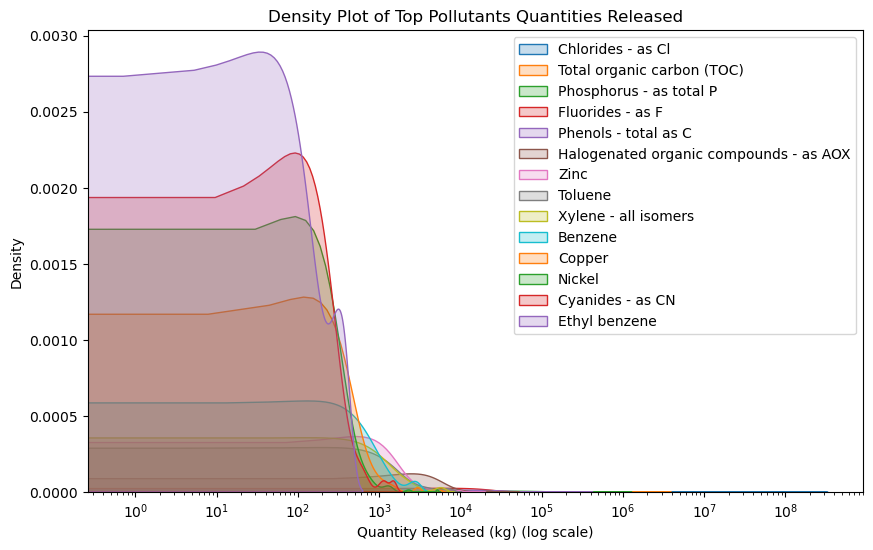

In [7]:
# Select relevant columns and remove null values
df_filtered = df[['SUBSTANCE NAME', 'QUANTITY RELEASED (kg)']].dropna()

# Count the average release of each pollutant
top_substances = df_filtered.groupby("SUBSTANCE NAME")["QUANTITY RELEASED (kg)"].mean().nlargest(15)

# Box plot of pollutant releases (detecting outliers)
plt.figure(figsize=(14, 6))
top_substance_names = top_substances.index
df_top = df_filtered[df_filtered["SUBSTANCE NAME"].isin(top_substance_names)]
sns.boxplot(x="SUBSTANCE NAME", y="QUANTITY RELEASED (kg)", data=df_top)
plt.xticks(rotation=90)
plt.yscale("log")  # Use logarithmic scale
plt.xlabel("Substance Name")
plt.ylabel("Quantity Released (kg) (log scale)")
plt.title("Boxplot of Pollutant Quantities Released")
plt.show()

# Density map of pollutant release
plt.figure(figsize=(10, 6))
for substance in top_substance_names:
    sns.kdeplot(df_filtered[df_filtered["SUBSTANCE NAME"] == substance]["QUANTITY RELEASED (kg)"], 
                label=substance, fill=True)
    
plt.xscale("log")
plt.xlabel("Quantity Released (kg) (log scale)")
plt.ylabel("Density")
plt.title("Density Plot of Top Pollutants Quantities Released")
plt.legend()
plt.show()